<a href="https://colab.research.google.com/github/akanksha0911/HAC_SingleLinkage/blob/main/HAC_SingleLink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libs and create the data frame from given points in assignment**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

array = np.array([[2,2], [2,6], [3,7], [5,2], [5,5], [5,8], [6,6], [7,3], [8,4], [10,6], [12,8]])

point = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10', 'P11']

data = pd.DataFrame(data=array, index=point, columns=["X", "Y"])
print(data)

      X  Y
P1    2  2
P2    2  6
P3    3  7
P4    5  2
P5    5  5
P6    5  8
P7    6  6
P8    7  3
P9    8  4
P10  10  6
P11  12  8


**Visualize the data using a Scatter Plot**

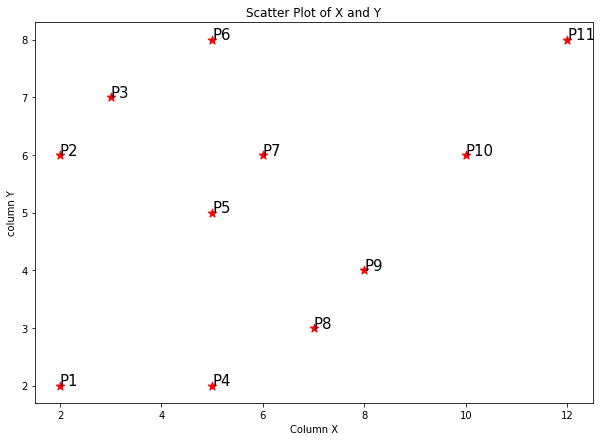

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(data['X'], data['Y'], s=80, c='r', marker='*')
plt.xlabel('Column X')
plt.ylabel('column Y')
plt.title('Scatter Plot of X and Y')
for j in data.itertuples():
    plt.annotate(j.Index, (j.X, j.Y), fontsize=15)

**Calculating the distance matrix in Euclidean method using pdist**

In [15]:
from scipy.spatial.distance import squareform, pdist
dist = pd.DataFrame(squareform(pdist(data[['X', 'Y']]), 'euclidean'), columns=data.index.values, index=data.index.values)
dist

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
P1,0.000000,4.000000,5.099020,3.000000,4.242641,6.708204,5.656854,5.099020,6.324555,8.944272,11.661904
P2,4.000000,0.000000,1.414214,5.000000,3.162278,3.605551,4.000000,5.830952,6.324555,8.000000,10.198039
P3,5.099020,1.414214,0.000000,5.385165,2.828427,2.236068,3.162278,5.656854,5.830952,7.071068,9.055385
P4,3.000000,5.000000,5.385165,0.000000,3.000000,6.000000,4.123106,2.236068,3.605551,6.403124,9.219544
P5,4.242641,3.162278,2.828427,3.000000,0.000000,3.000000,1.414214,2.828427,3.162278,5.099020,7.615773
P6,6.708204,3.605551,2.236068,6.000000,3.000000,0.000000,2.236068,5.385165,5.000000,5.385165,7.000000
P7,5.656854,4.000000,3.162278,4.123106,1.414214,2.236068,0.000000,3.162278,2.828427,4.000000,6.324555
P8,5.099020,5.830952,5.656854,2.236068,2.828427,5.385165,3.162278,0.000000,1.414214,4.242641,7.071068
P9,6.324555,6.324555,5.830952,3.605551,3.162278,5.000000,2.828427,1.414214,0.000000,2.828427,5.656854
P10,8.944272,8.000000,7.071068,6.403124,5.099020,5.385165,4.000000,4.242641,2.828427,0.000000,2.828427


**Look for the least distance and merge those into a cluster**

here we see 1.414214 is the smallest distance [P3,P2] [P5,P7] [P8,P9] , and P2 and P3 comes first in matrix so merging P2 and P3, then find minimum distance from cluster to other points and form new distance matrix.


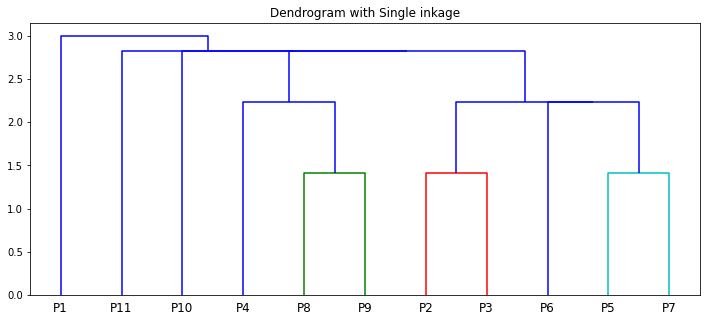

In [16]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with Single inkage")  
dend = shc.dendrogram(shc.linkage(data[['X', 'Y']], method='single'), labels=data.index)

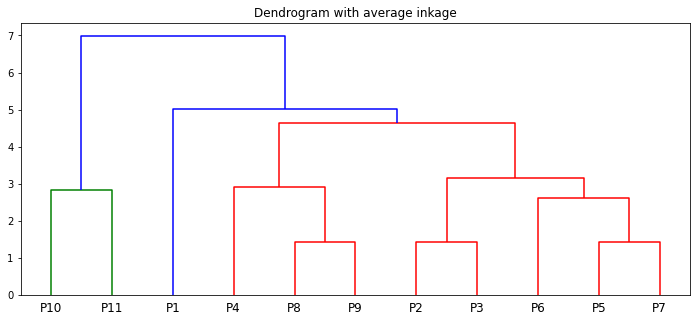

In [17]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with average inkage")  
dend = shc.dendrogram(shc.linkage(data[['X', 'Y']], method='average'), labels=data.index)

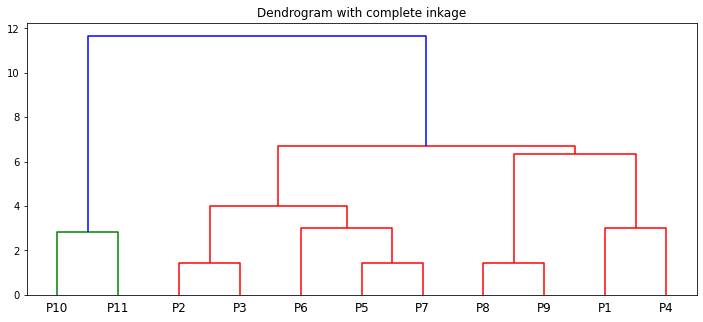

In [18]:
plt.figure(figsize=(12,5)) 
plt.title("Dendrogram with complete inkage")  
dend = shc.dendrogram(shc.linkage(data[['X', 'Y']], method='complete'), labels=data.index)

[1 0 0 0 0 0 0 0 0 0 2]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=3)


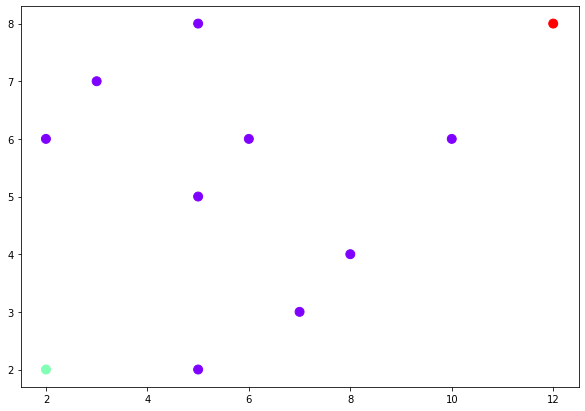

In [19]:
cluster1=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
print(cluster1.fit_predict(data))
print(cluster1.fit(data))
labels = cluster1.labels_
plt.figure(figsize=(10, 7)) 
plt.scatter(data['X'], data['Y'], c=labels, s=80, cmap ='rainbow')

plt.show()


[2 0 0 0 0 0 0 0 0 1 1]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)


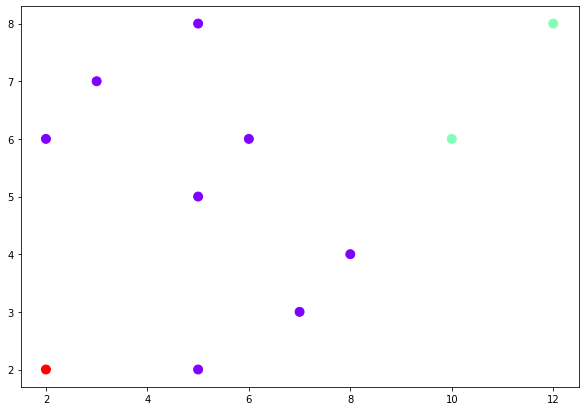

In [20]:
cluster2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average') 
print(cluster2.fit_predict(data))
print(cluster2.fit(data))
plt.figure(figsize=(10, 7))  
plt.scatter(data['X'], data['Y'], c=cluster2.labels_, s= 80, cmap='rainbow')  
plt.show() 

[0 2 2 0 2 2 2 0 0 1 1]
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)


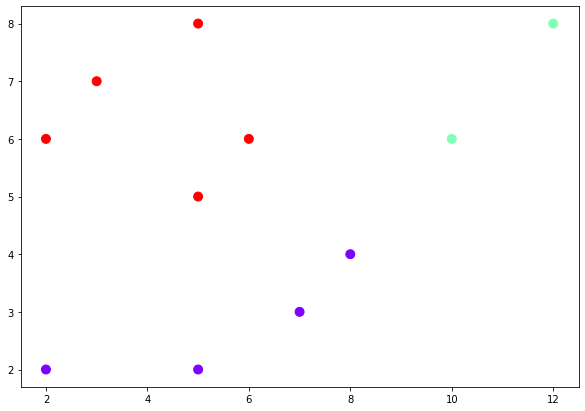

In [21]:
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete') 
print(cluster3.fit_predict(data))
print(cluster3.fit(data))
plt.figure(figsize=(10, 7))  
plt.scatter(data['X'], data['Y'], c=cluster3.labels_, s=80, cmap='rainbow')  
plt.show() 

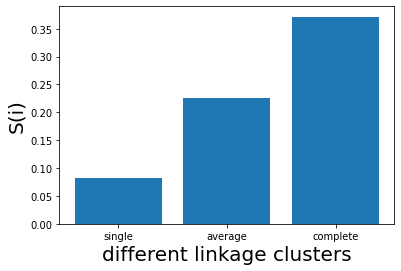

In [22]:
from sklearn.metrics import silhouette_score

c = ['single', 'average', 'complete']
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(data, cluster1.fit_predict(data)))
silhouette_scores.append(
        silhouette_score(data, cluster2.fit_predict(data)))
silhouette_scores.append(
        silhouette_score(data, cluster3.fit_predict(data)))

silhouette_scores
# # Plotting a bar graph to compare the results
plt.bar(c, silhouette_scores)
plt.xlabel('different linkage clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()